In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import RFE
import itertools
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.tree  import DecisionTreeClassifier
from sklearn import tree
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [98]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [99]:
import optuna

In [100]:
train = pd.read_csv("Train_data.csv")
test =  pd.read_csv("Test_data.csv")

In [101]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [103]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
# check for missing values
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [105]:
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

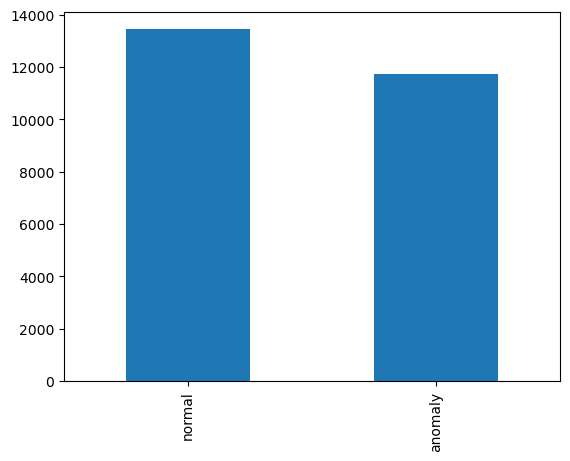

In [106]:
train['class'].value_counts().plot(kind='bar')
plt.show()

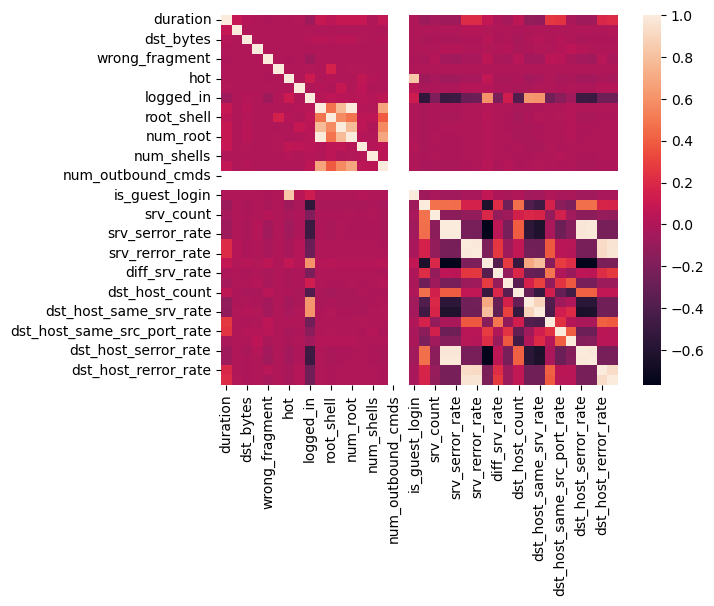

In [107]:
#plt.figure(figsize=(40,30))
correlation = train.corr()
sns.heatmap(correlation)
plt.show()

In [108]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [109]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype (train['class']) 

False

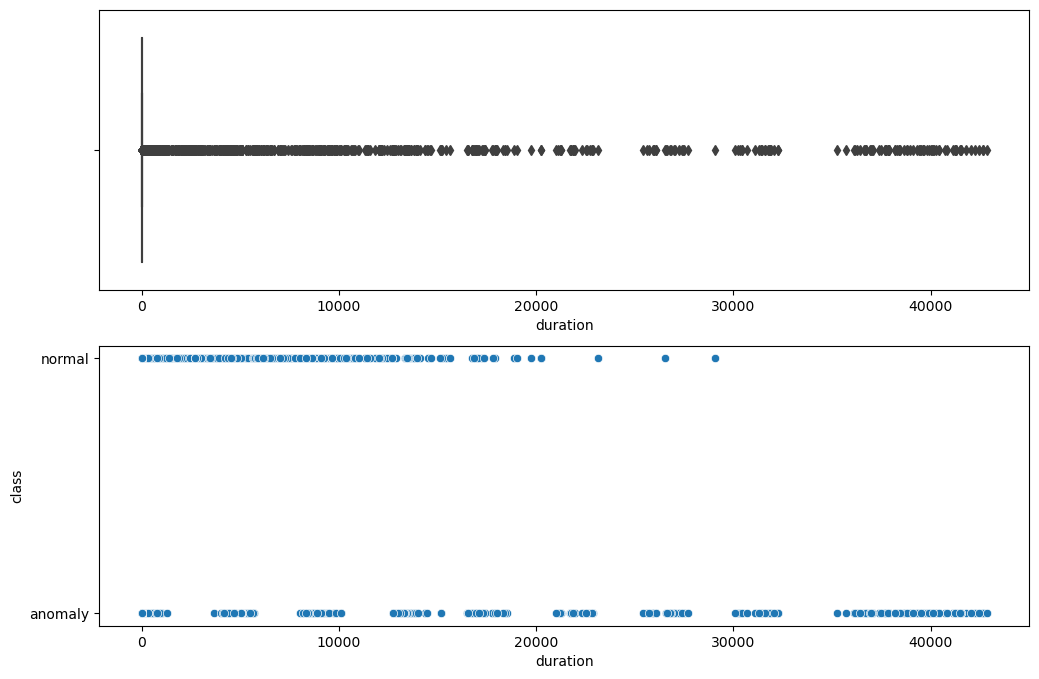

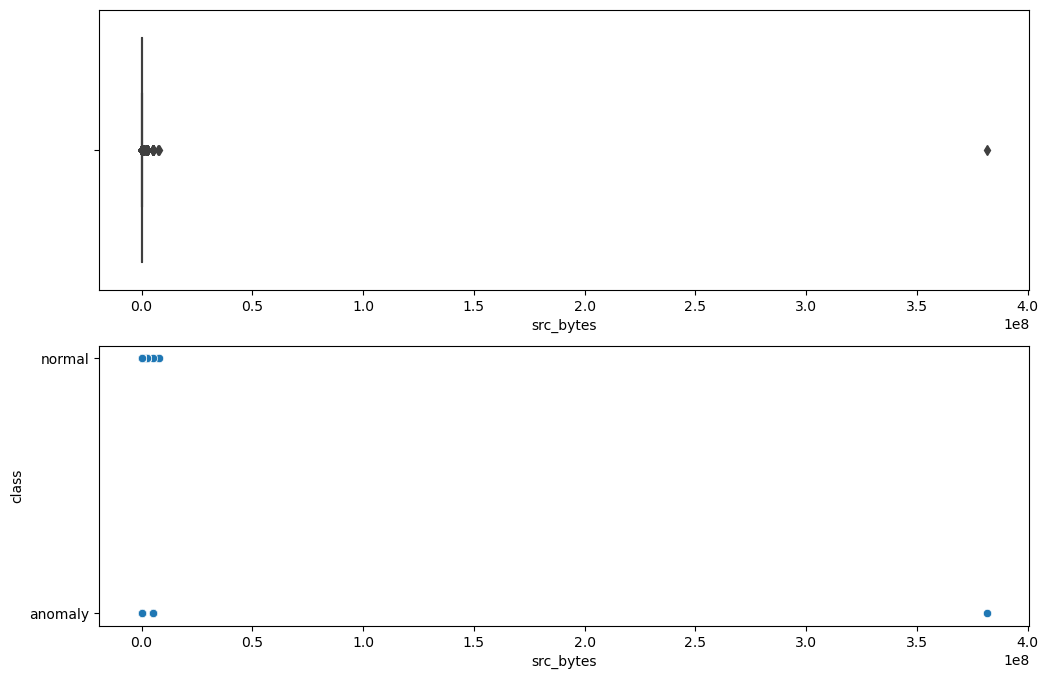

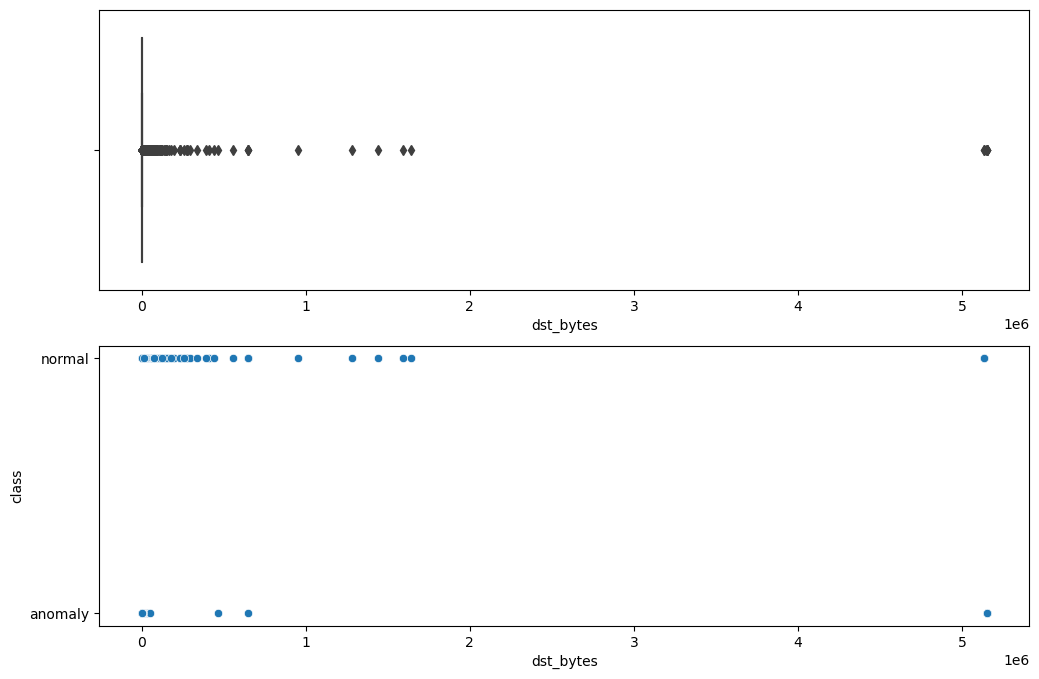

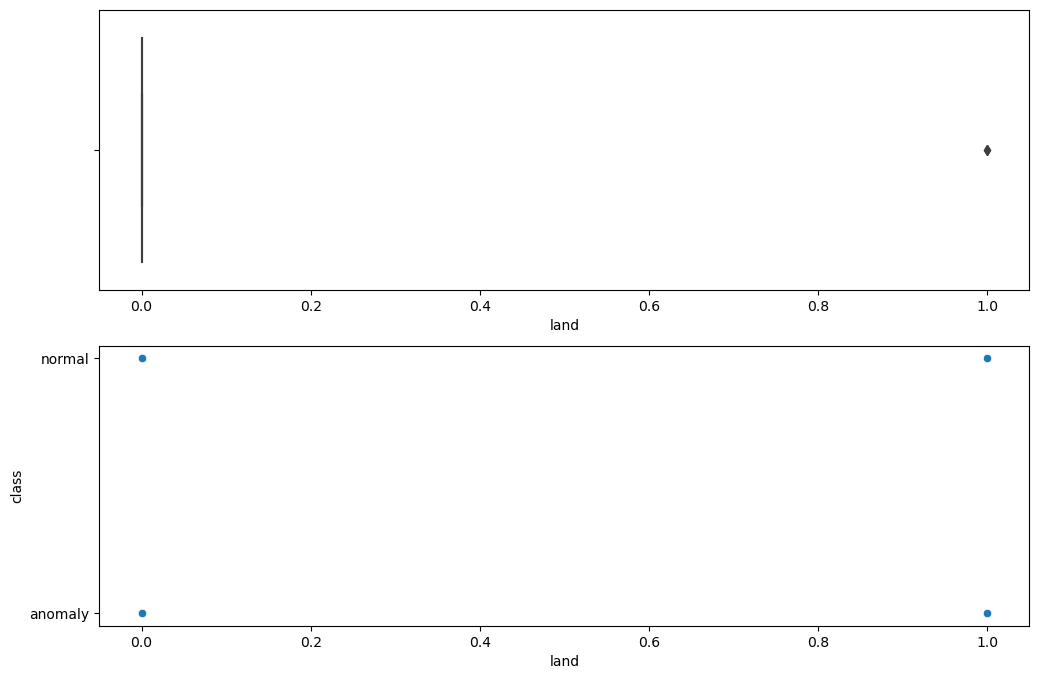

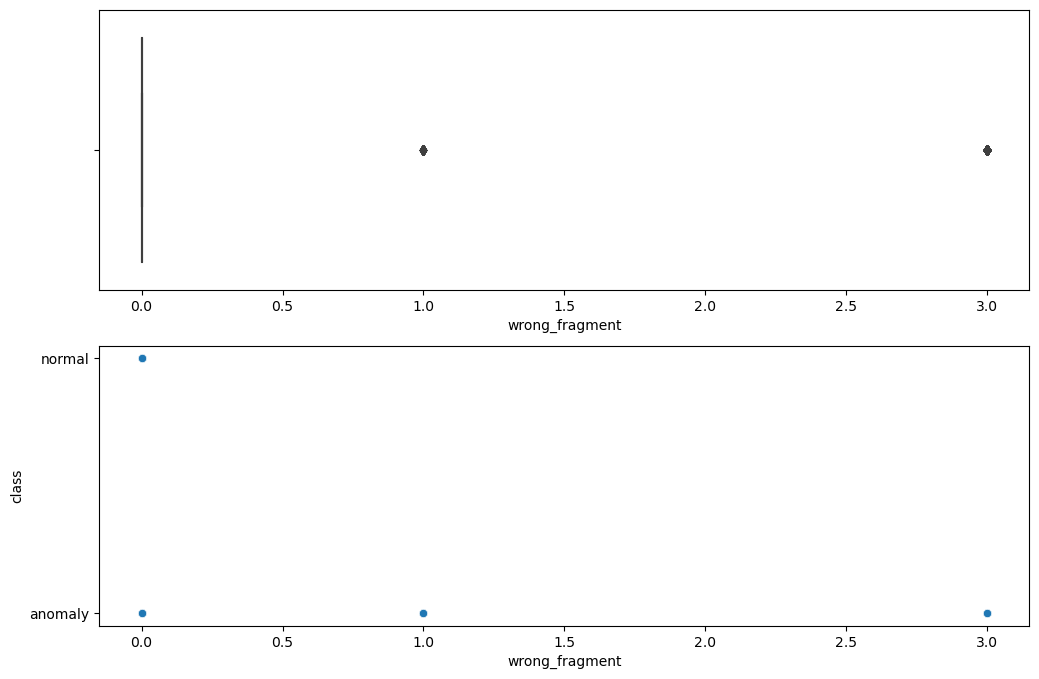

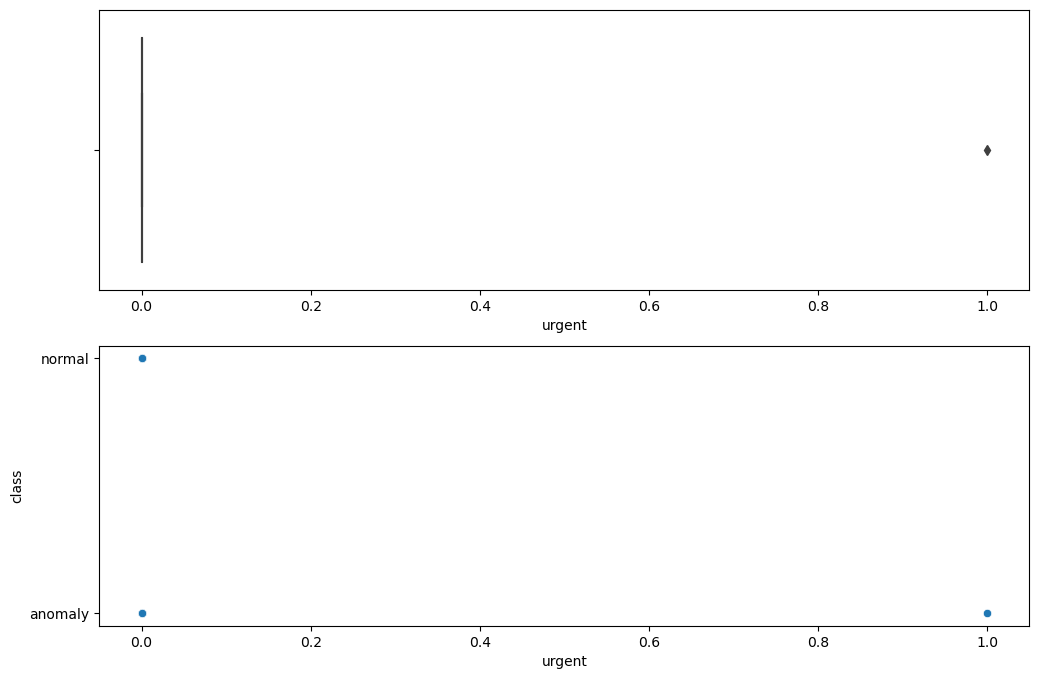

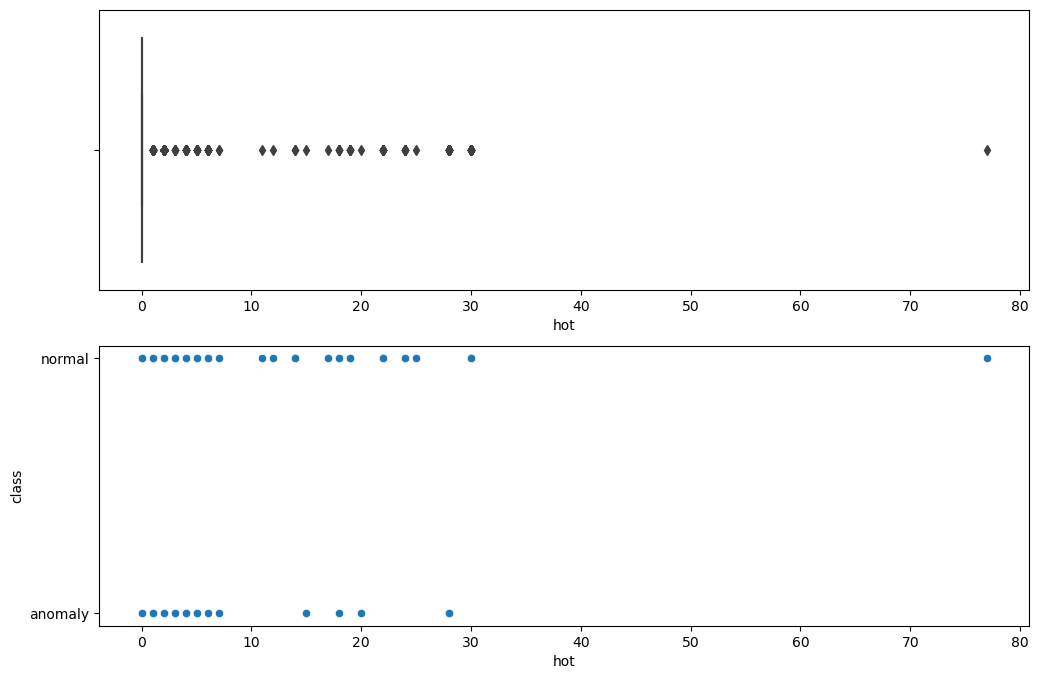

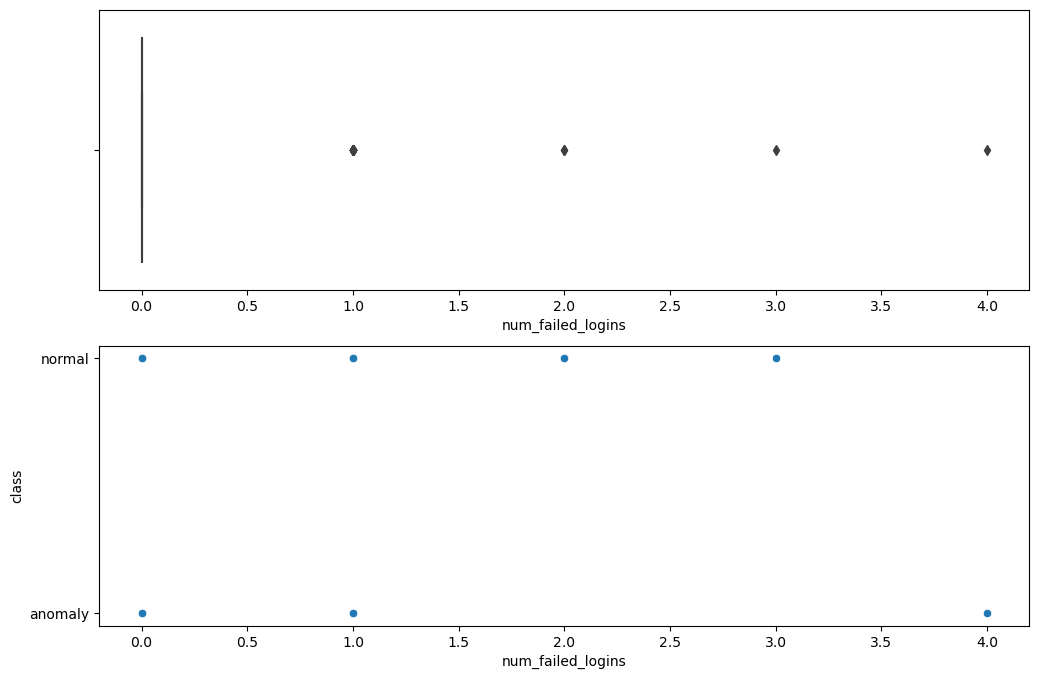

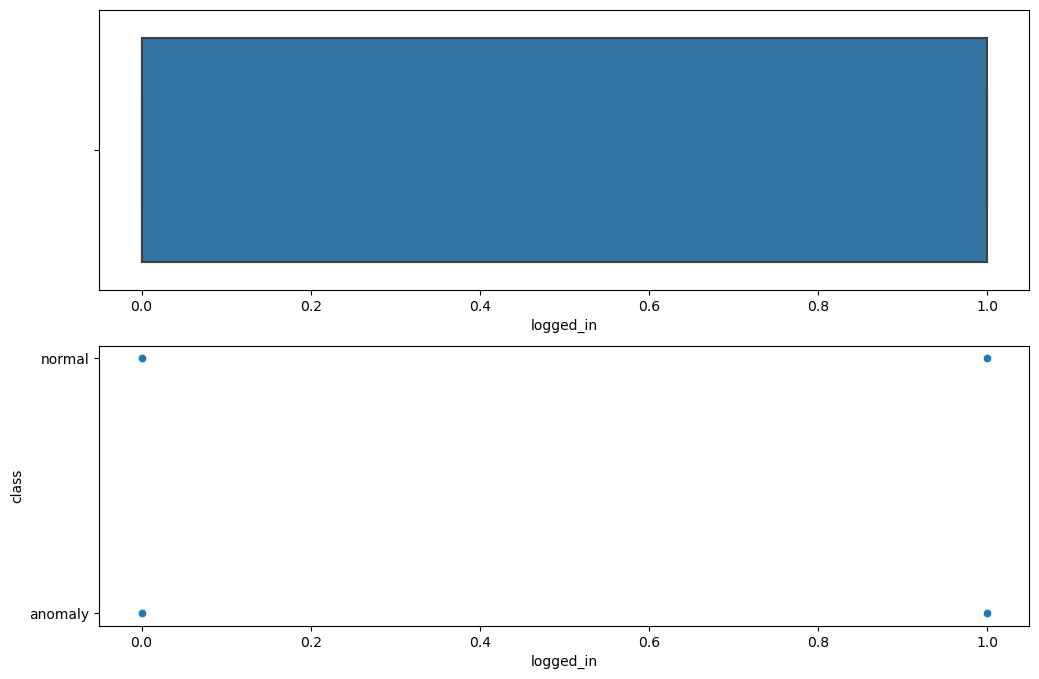

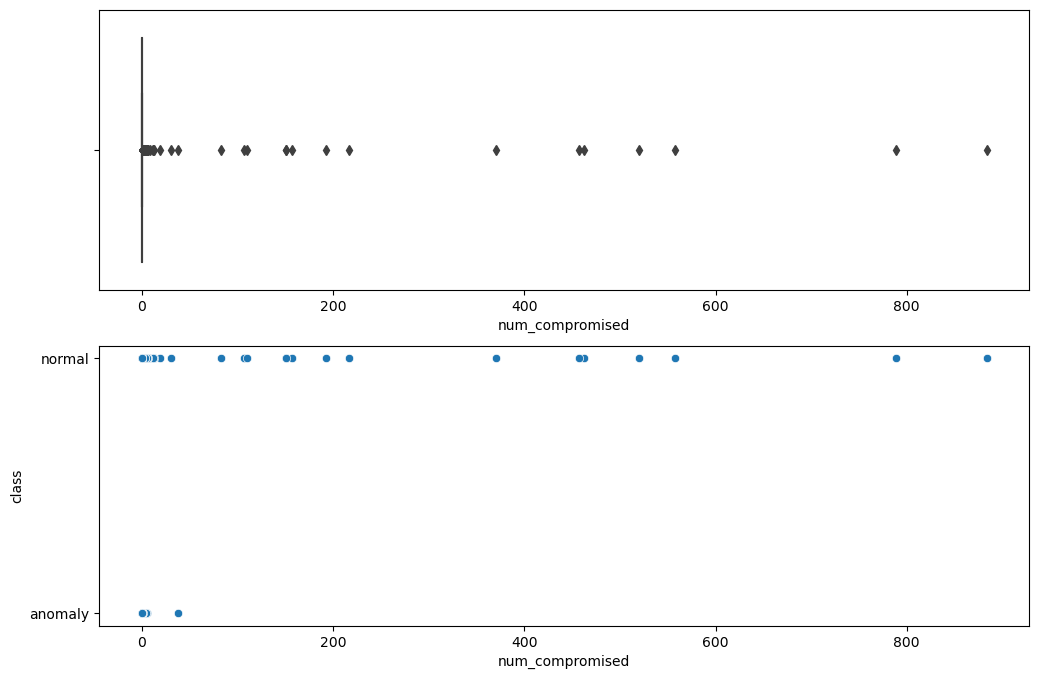

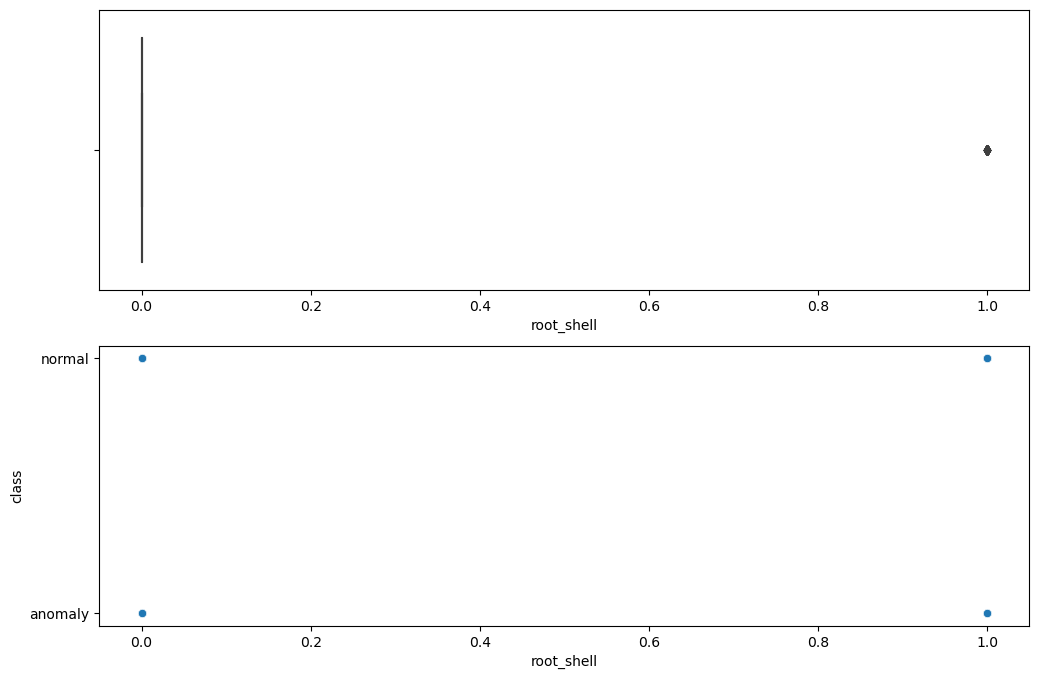

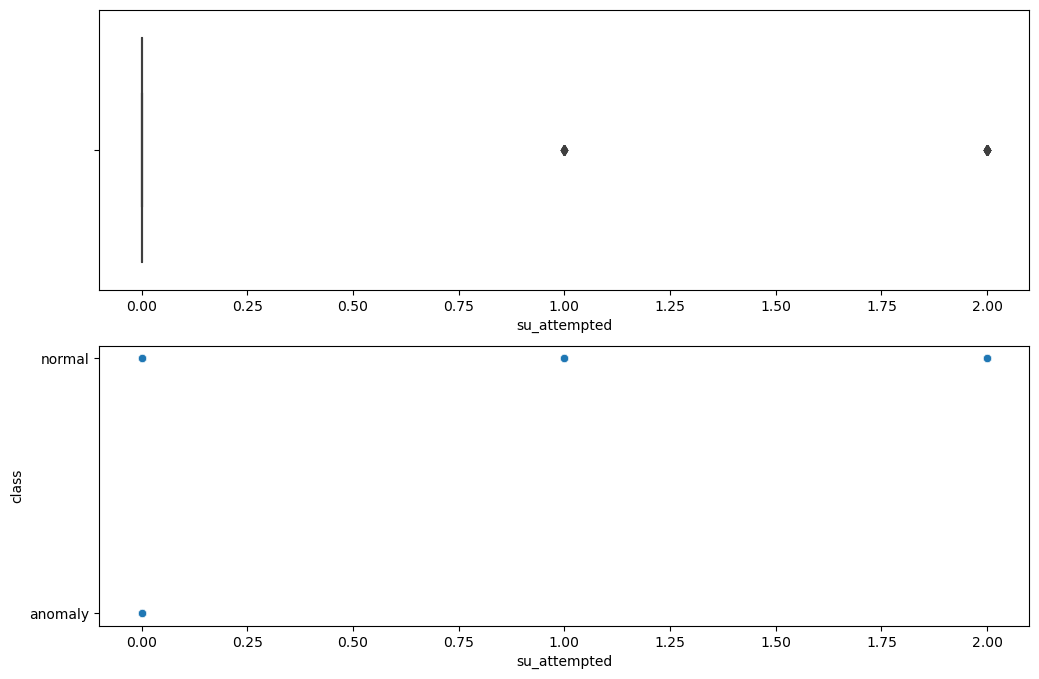

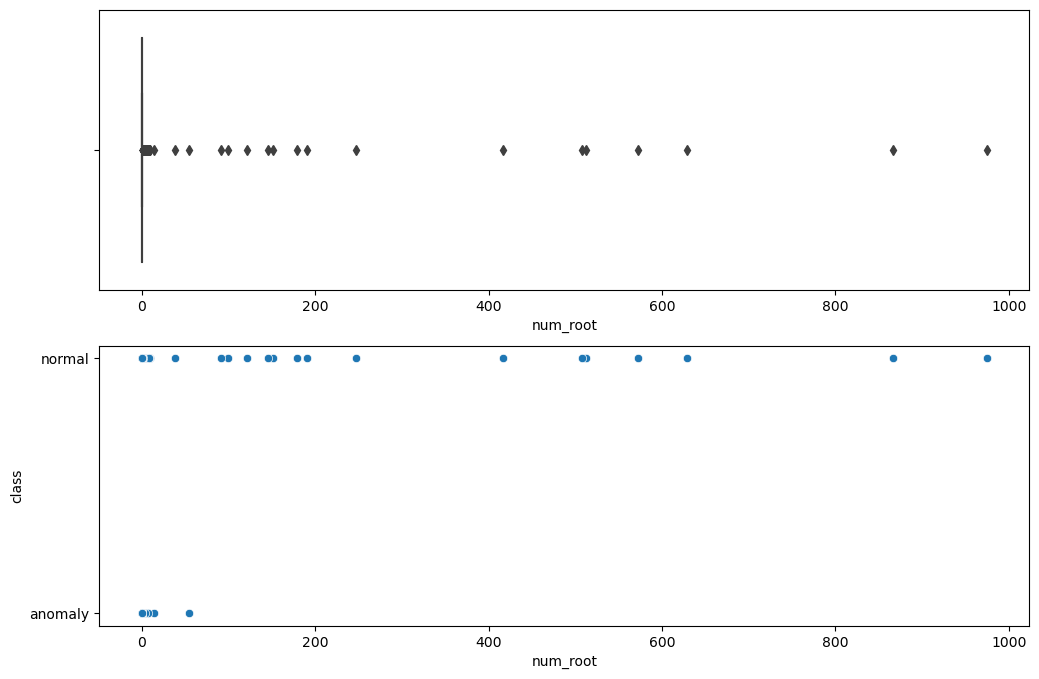

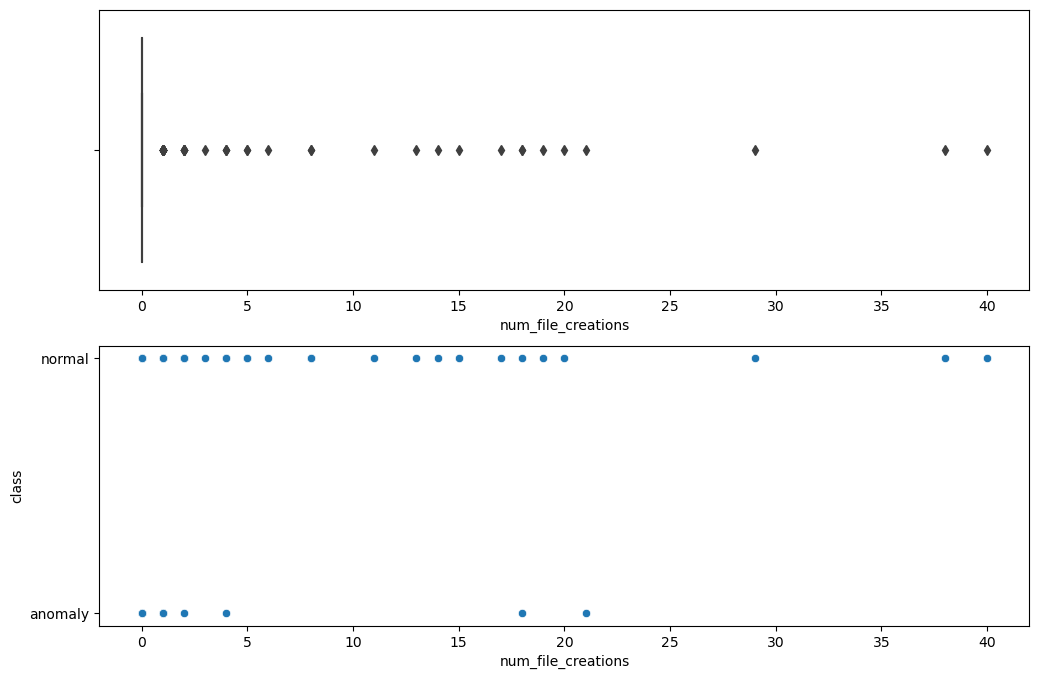

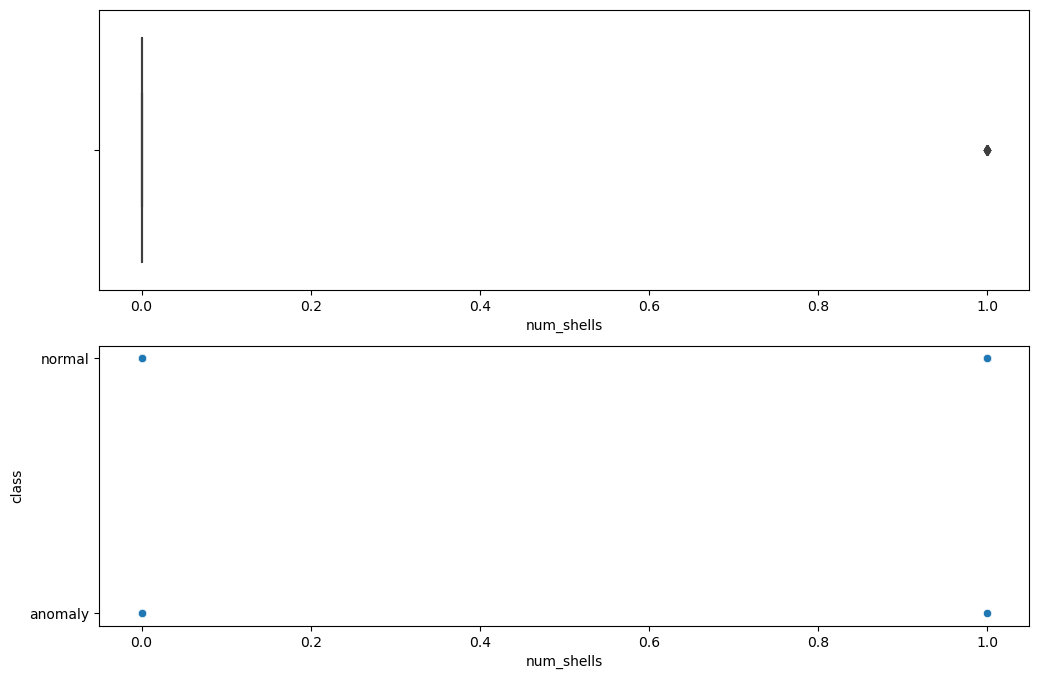

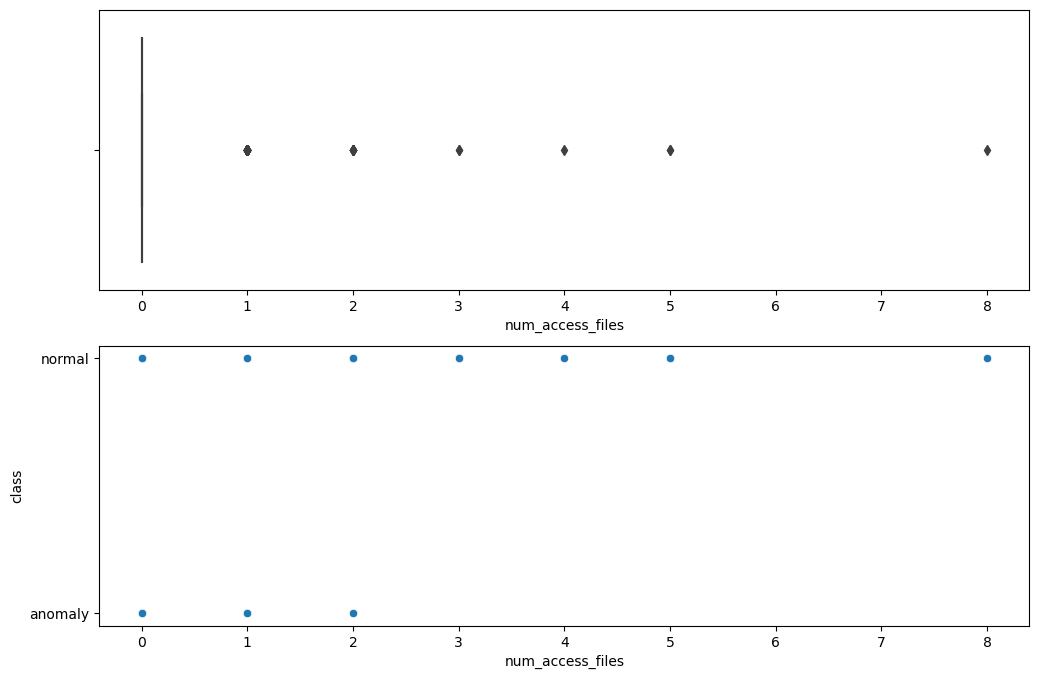

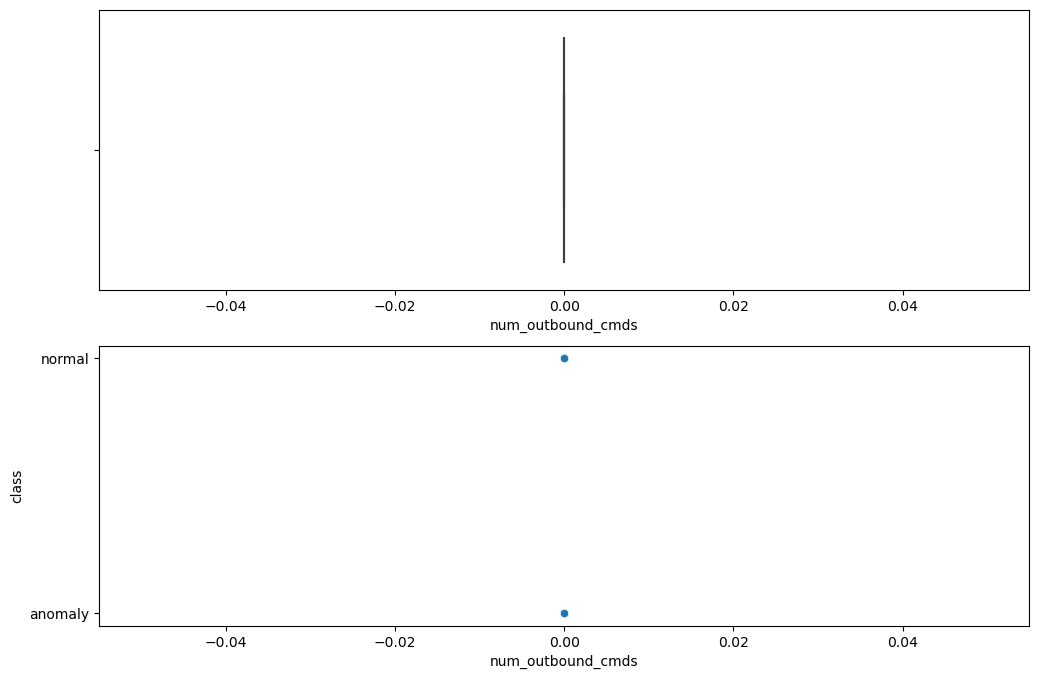

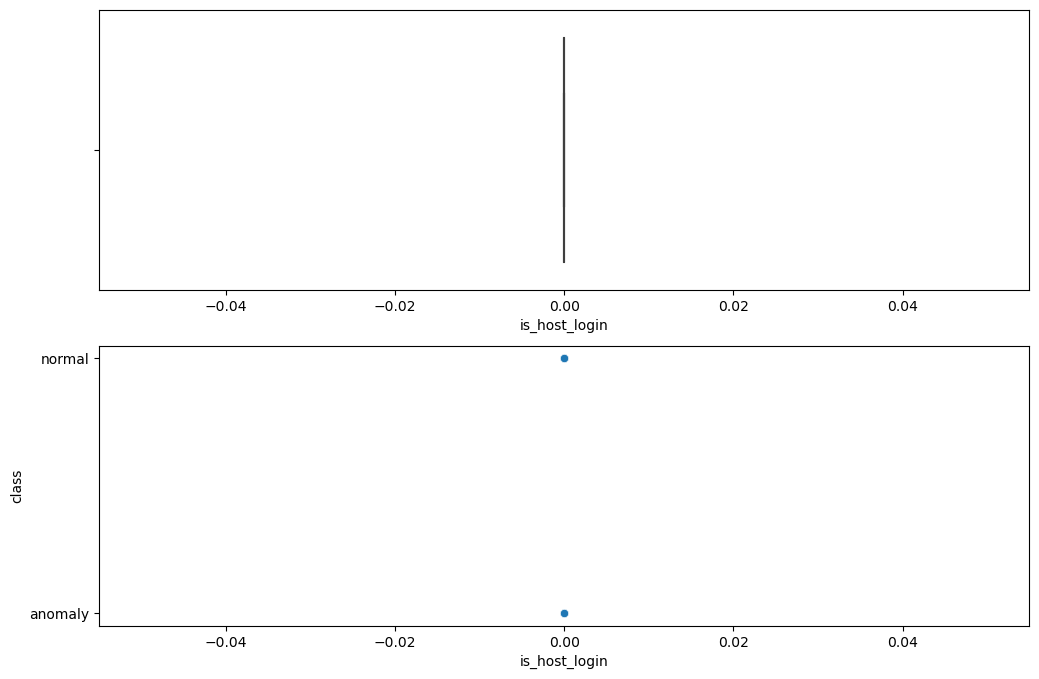

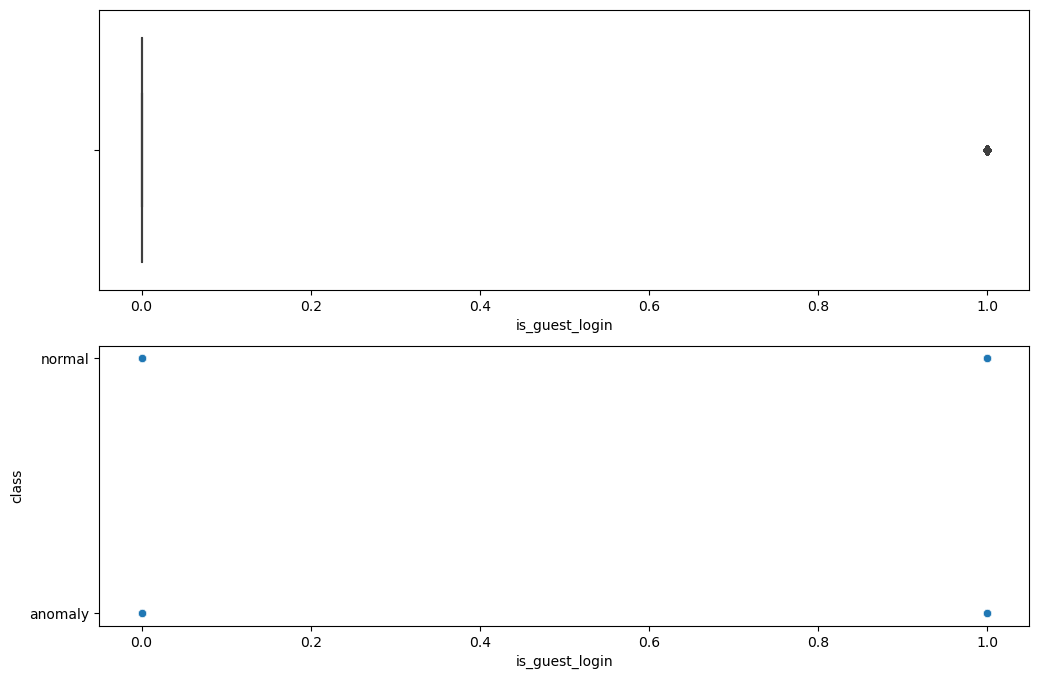

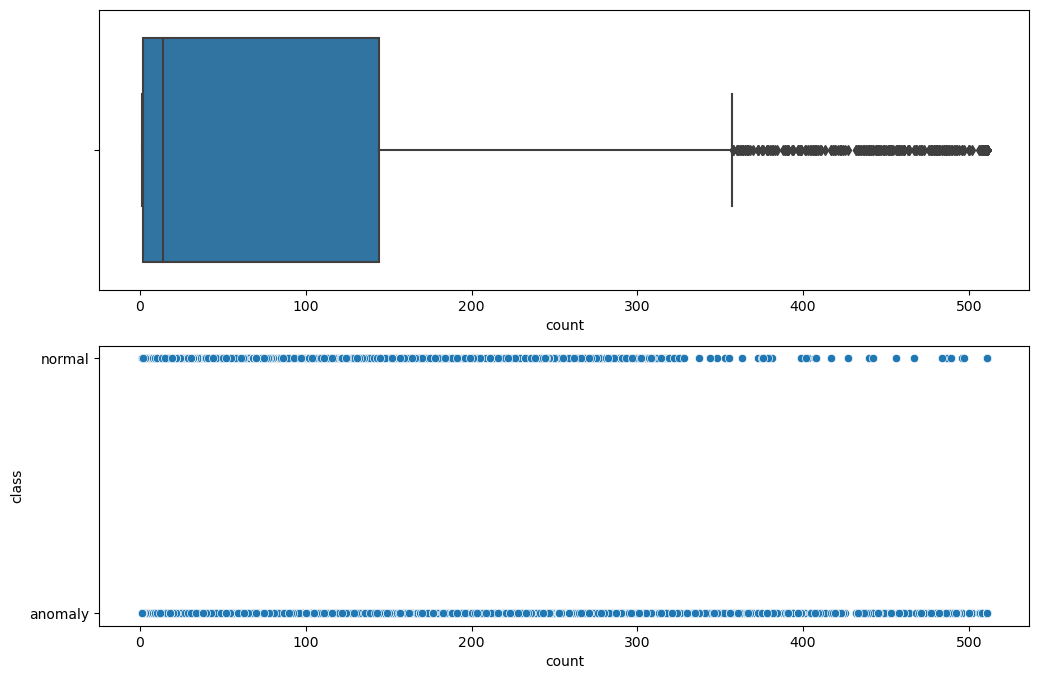

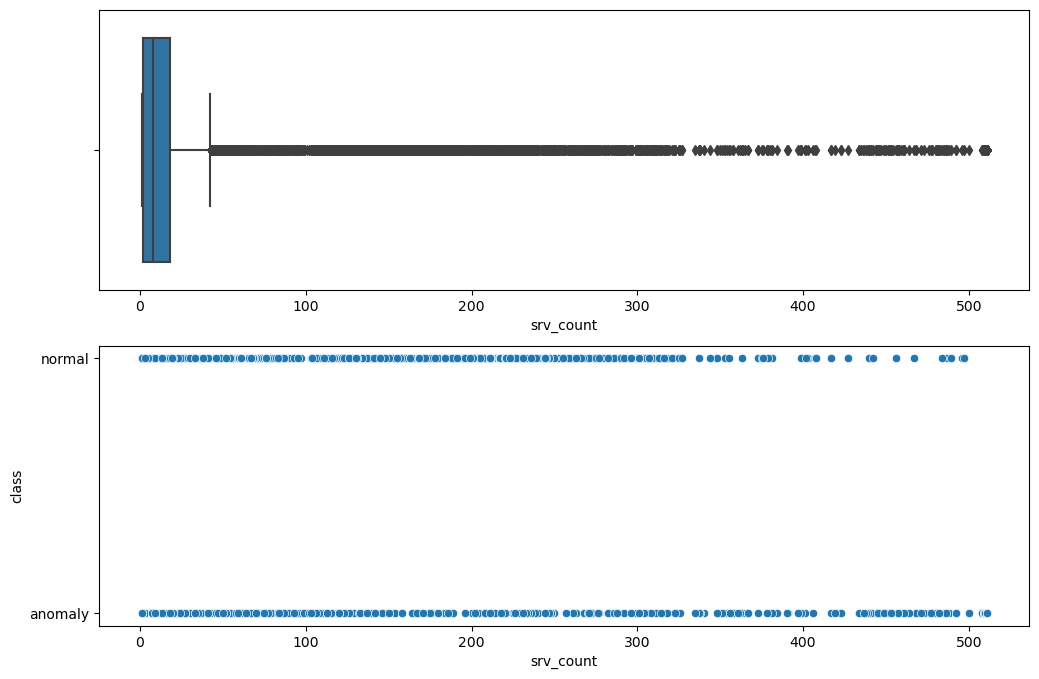

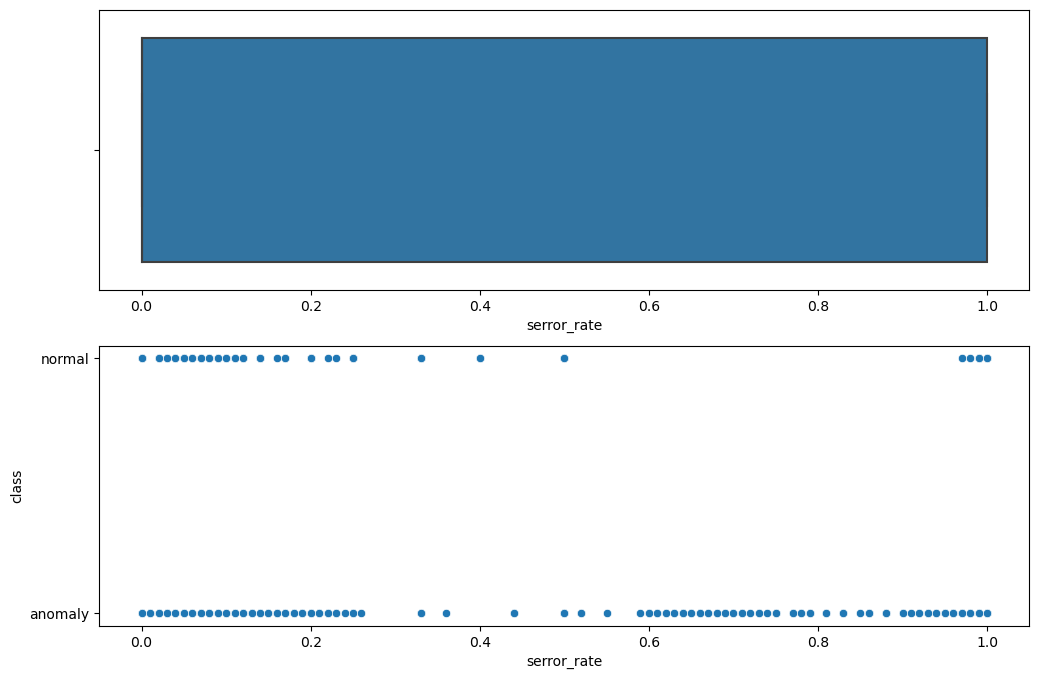

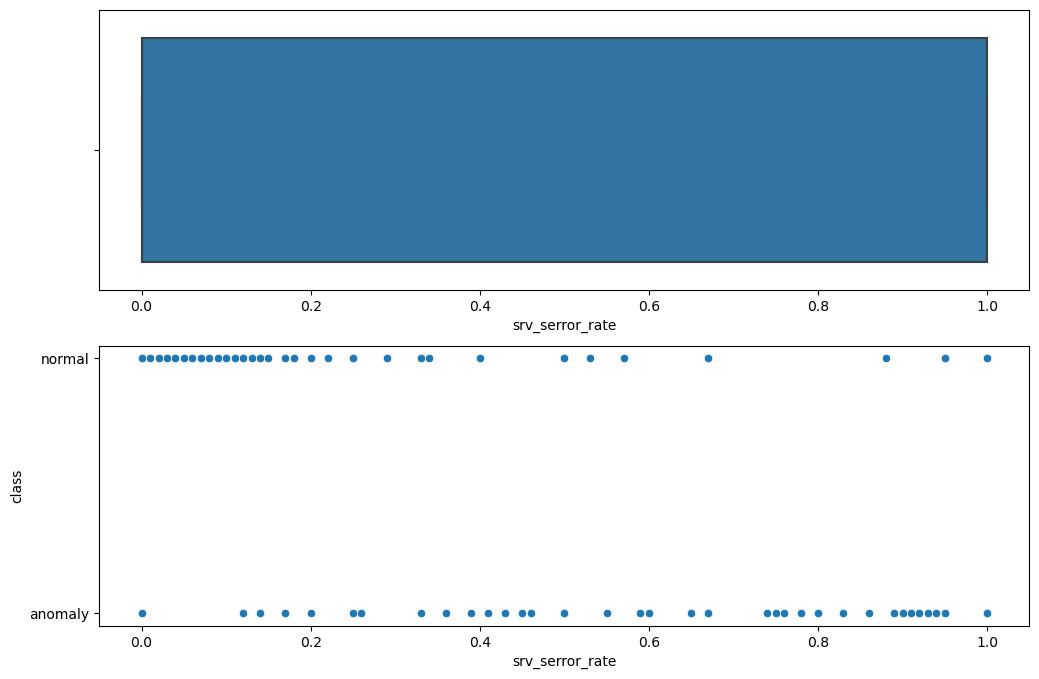

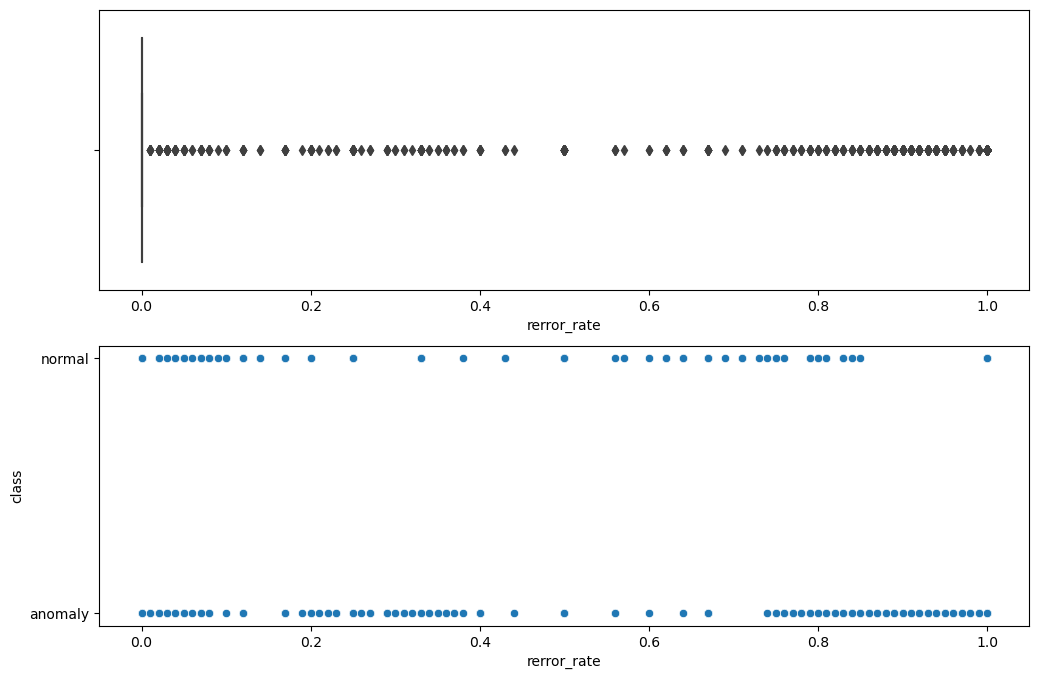

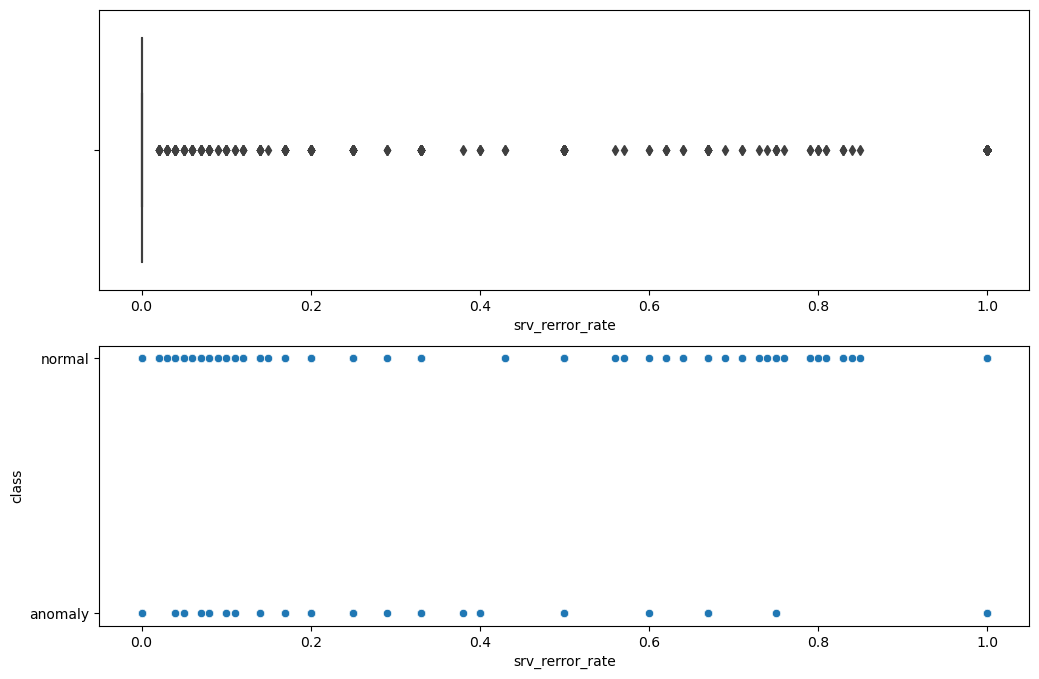

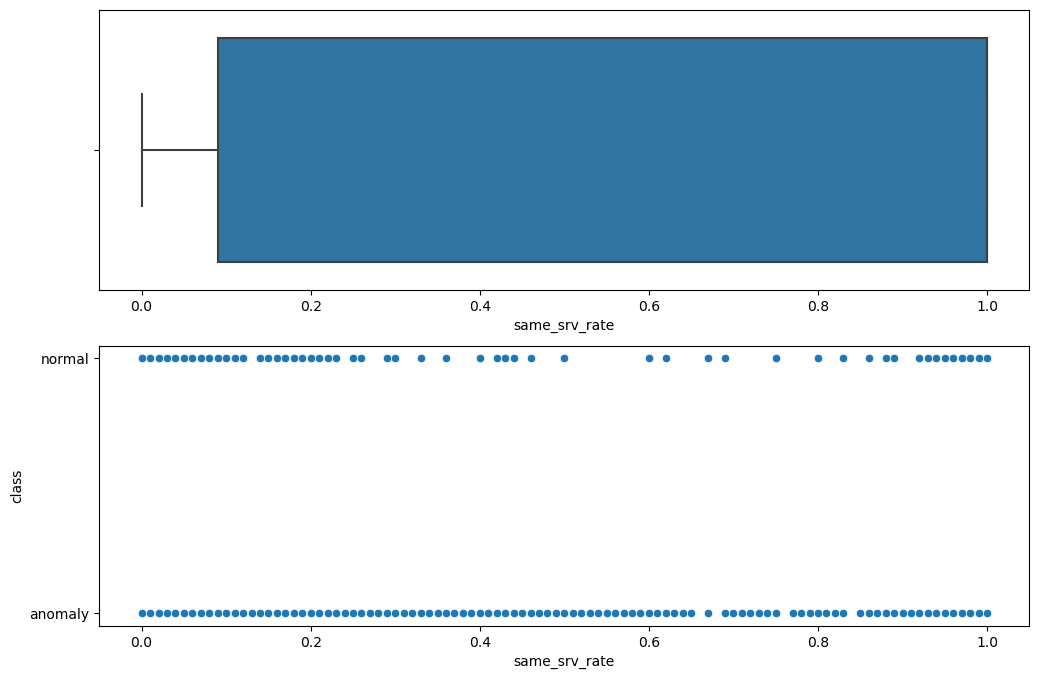

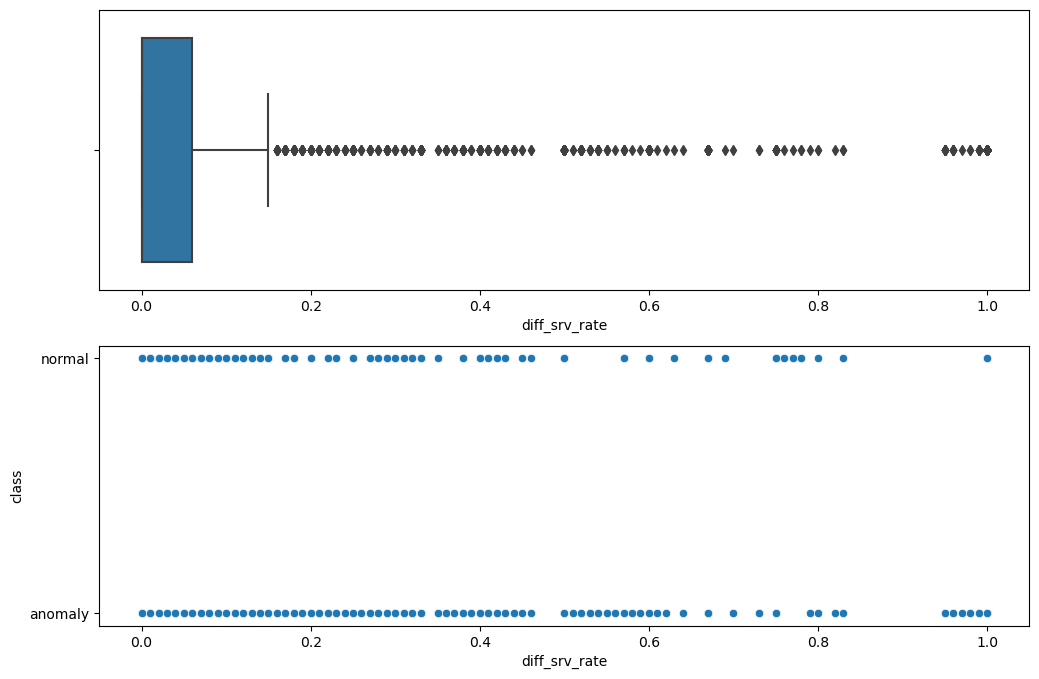

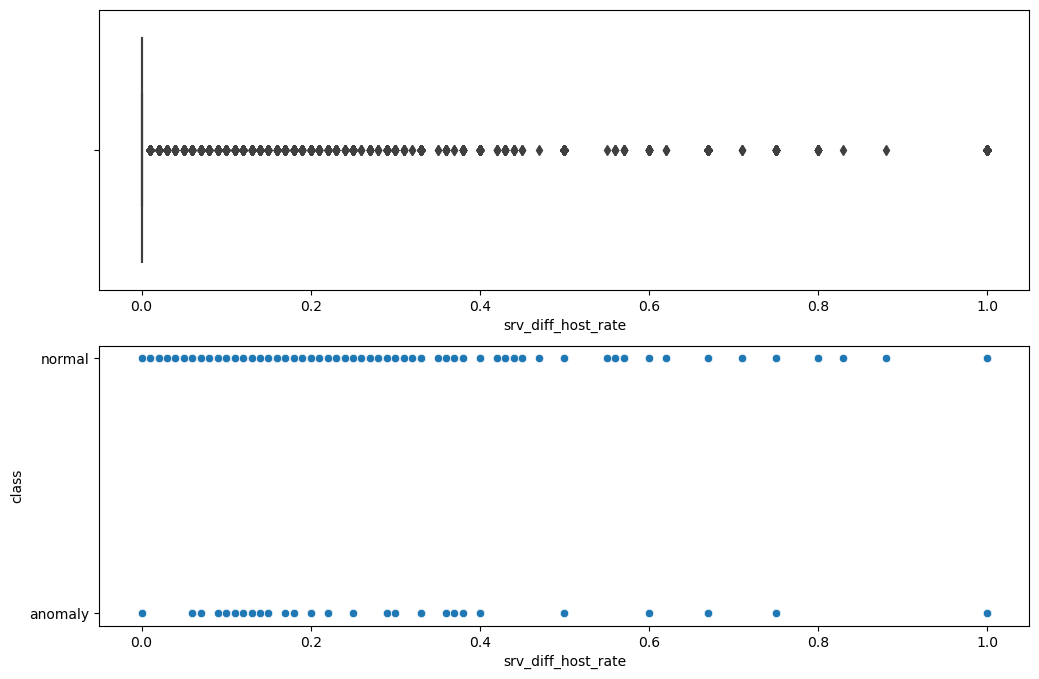

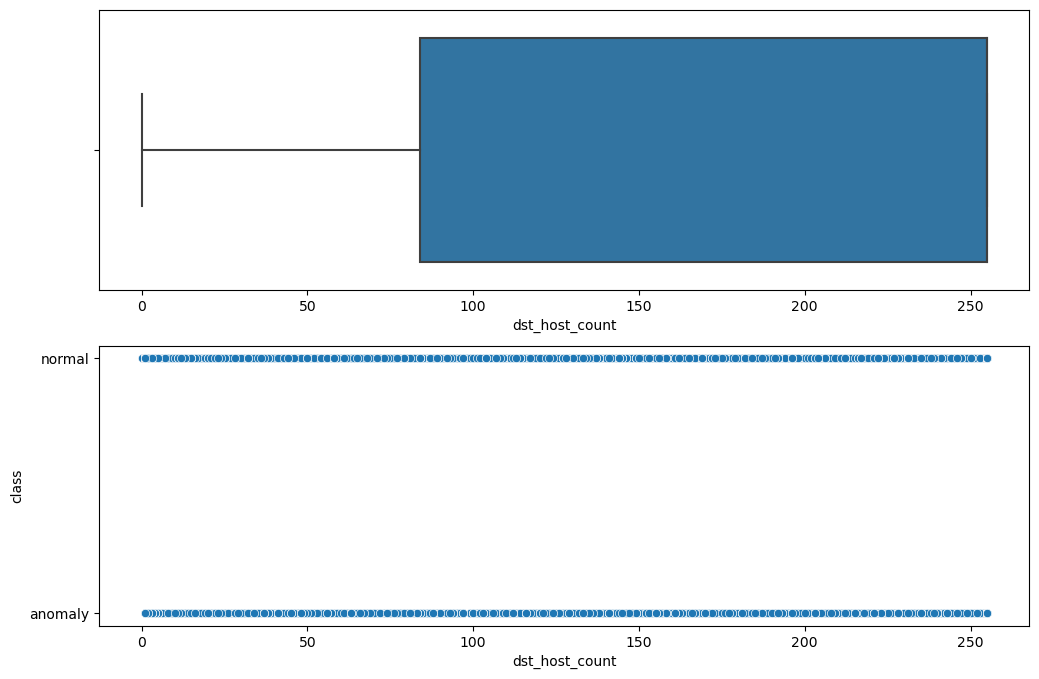

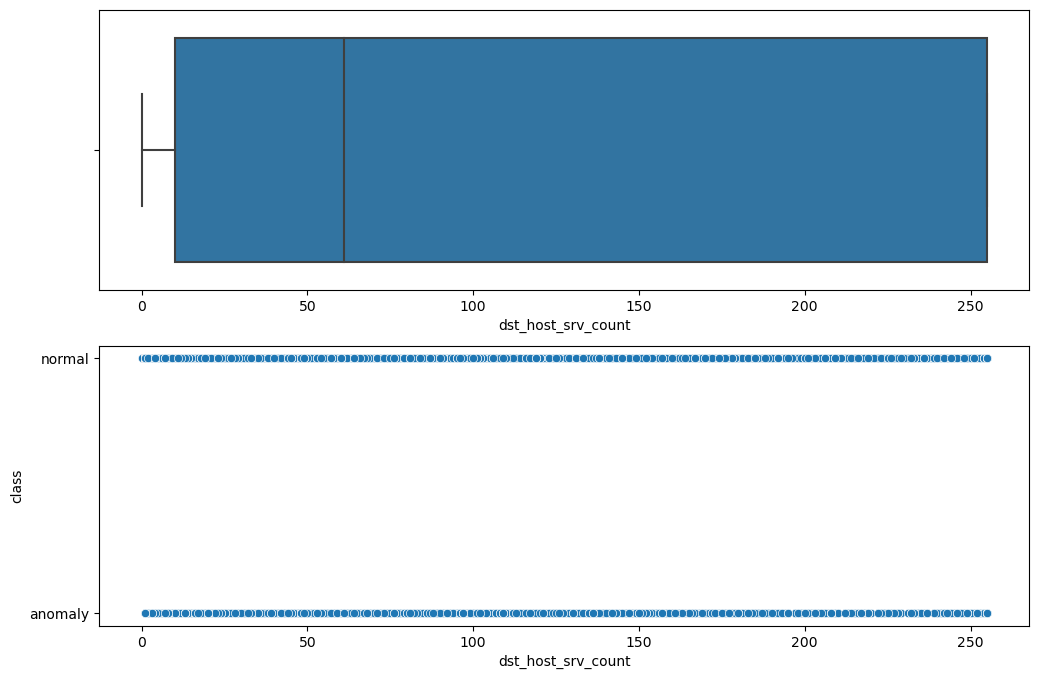

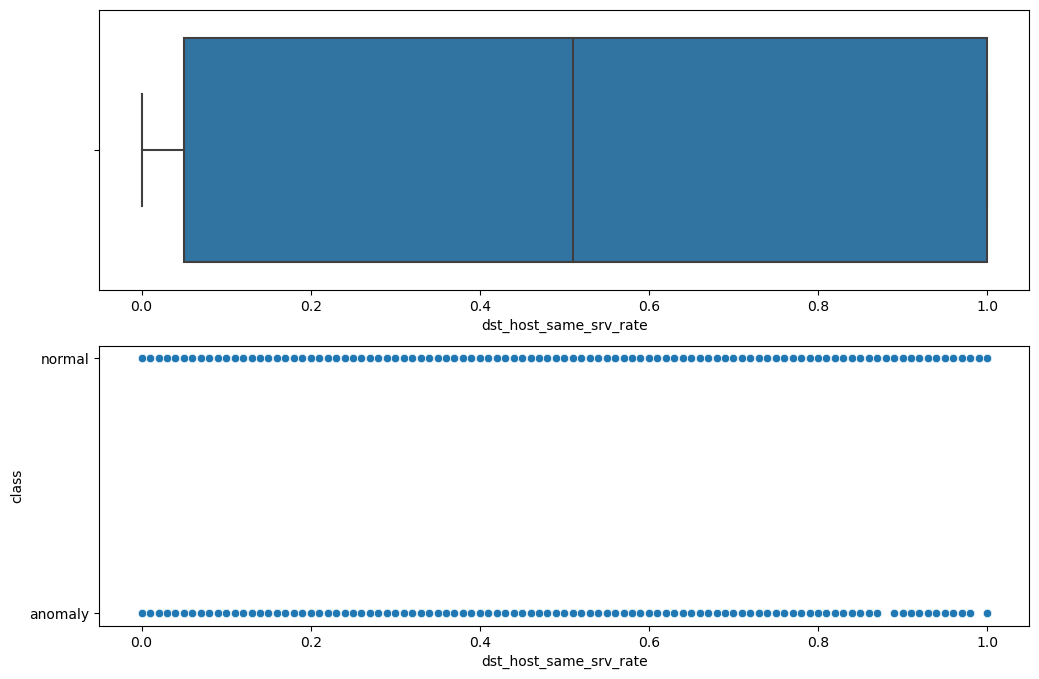

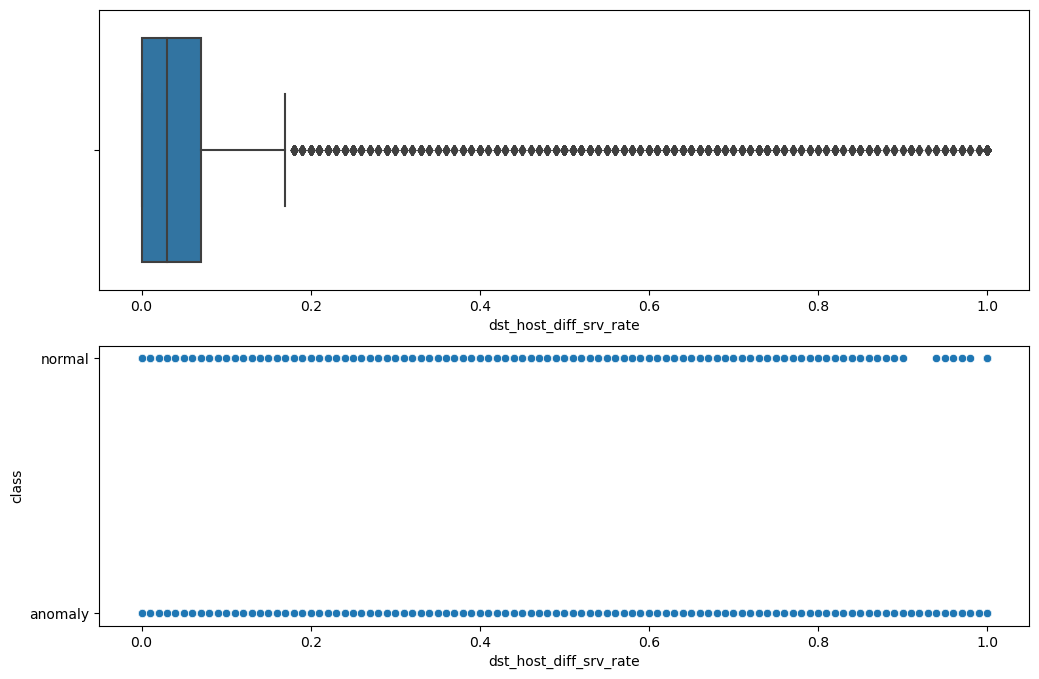

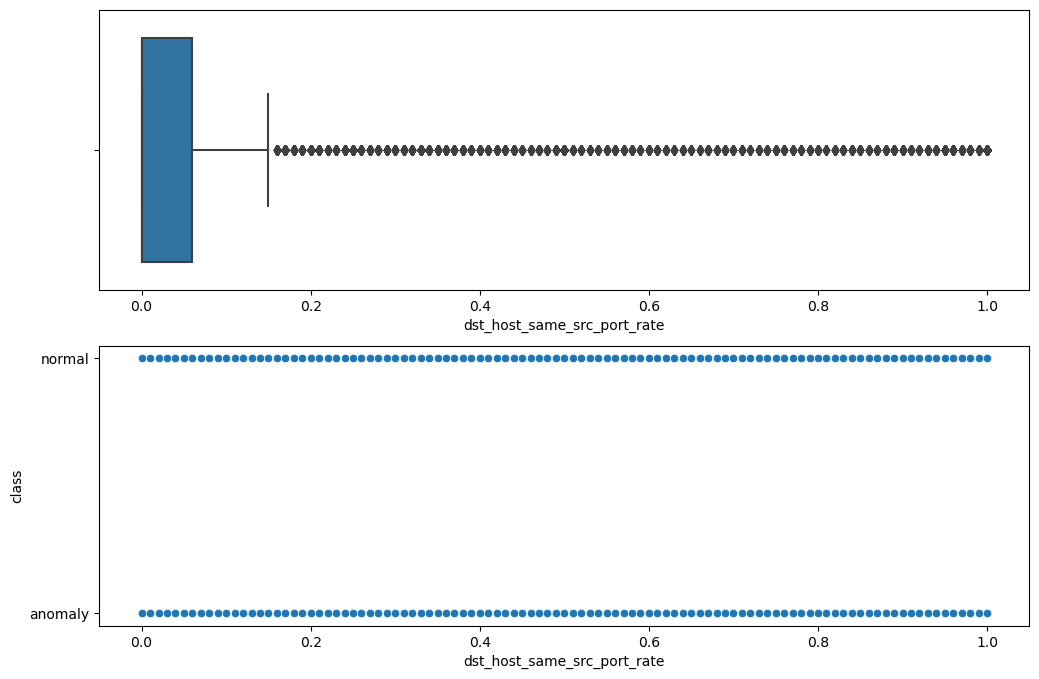

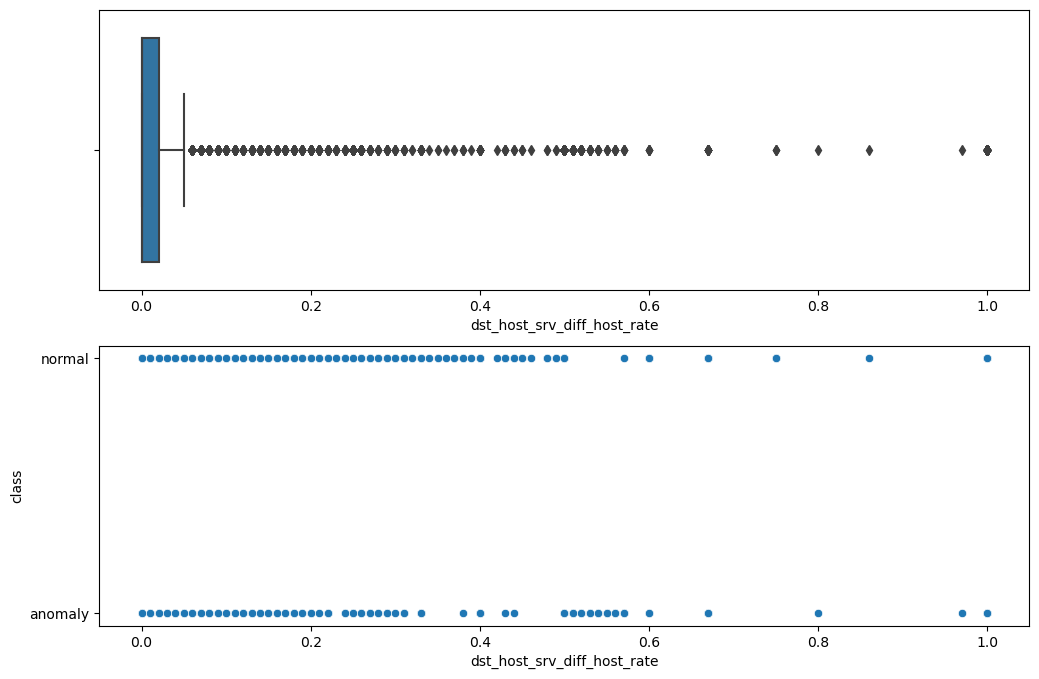

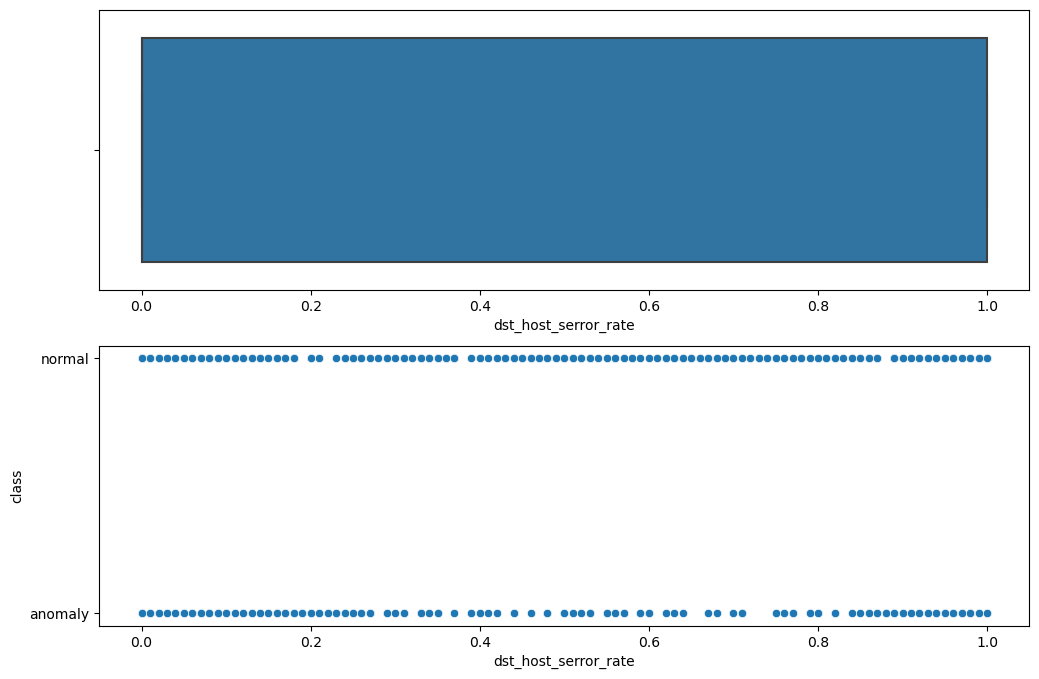

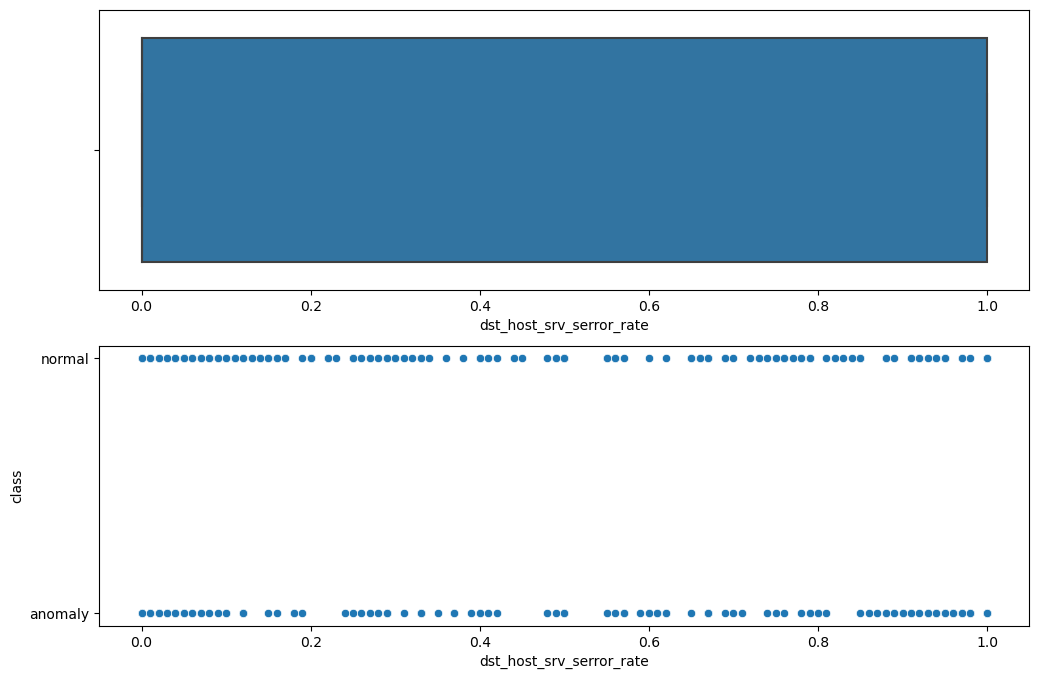

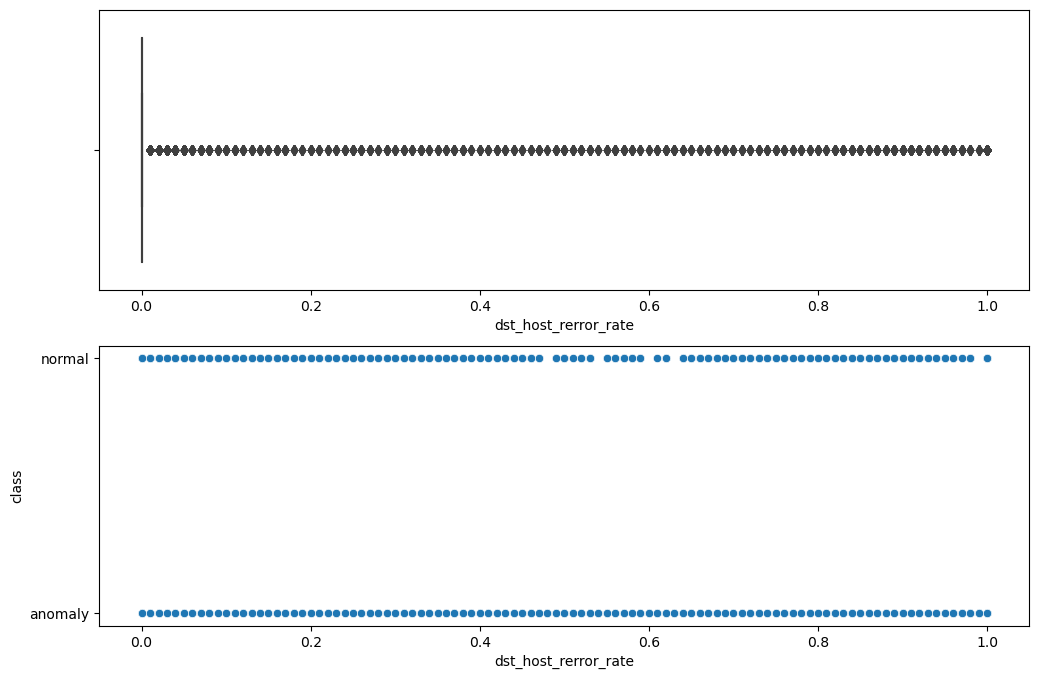

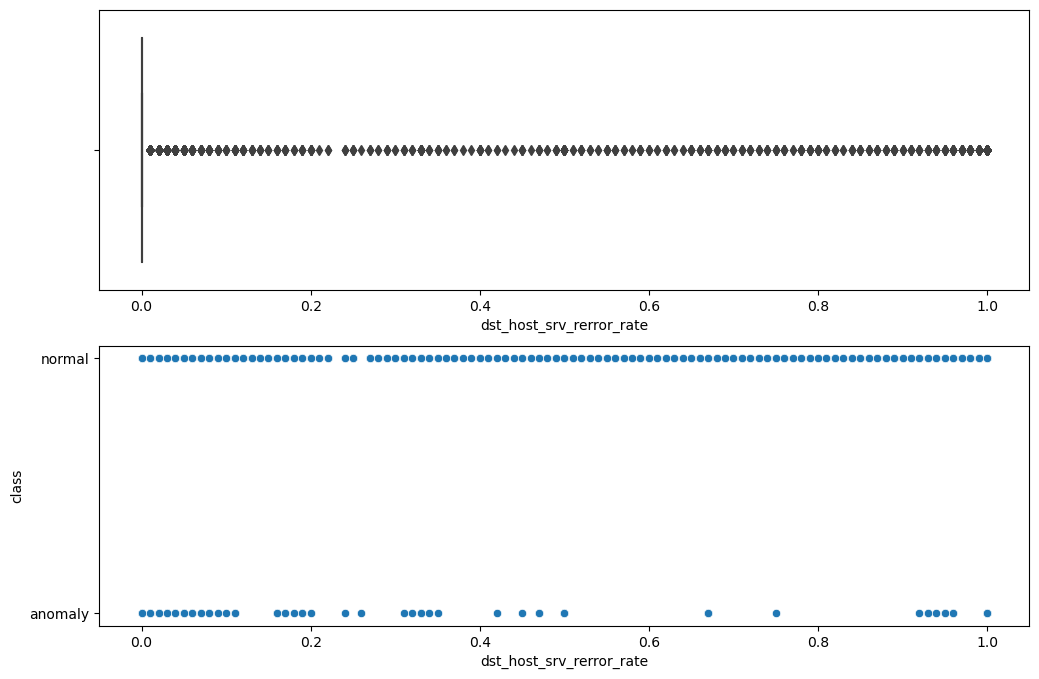

In [110]:
# check for outliers

for col in train:
     if col != 'class' and is_numeric_dtype(train[col]):
         fig, ax = plt.subplots(2, 1, figsize=(12, 8))
         g1 = sns.boxplot(x = train[col], ax=ax[0])
         g2 = sns.scatterplot(data=train, x=train[col],y=train['class'], ax=ax[1])
         plt.show()

In [111]:
# label encoding for categorical variable 
def le(df):
    for col in df.columns:
        if(df[col].dtype=='object'):
            label_encoder=LabelEncoder()
            df[col]=label_encoder.fit_transform(df[col])

In [112]:
le(train)
le(test)

In [113]:
X_train = train.drop("class",axis="columns")
Y_train = train['class']

In [114]:
# selecting best features

In [115]:
rfc=RandomForestClassifier()

In [116]:
rfe = RFE(rfc,n_features_to_select=10)

In [117]:
rfe=rfe.fit(X_train,Y_train)

In [118]:
filter = rfe.support_
print(filter)

[False  True  True  True  True  True False False False False False False
 False False False False False False False False False False  True False
 False False False False  True  True False False  True  True False False
 False False False False False]


In [119]:
feature_map = [(i,v) for i,v in itertools.zip_longest(rfe.support_,X_train.columns)]

In [120]:
selected_features = [v for i,v in feature_map if i==True]

In [121]:
selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [122]:
X_train=X_train[selected_features]

In [123]:
# split and scale the data

In [124]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test= scale.fit_transform(test)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [126]:
# model Training 

In [127]:
# SK GRADIENT BOOSTING
SKGB = GradientBoostingClassifier(random_state=42)
SKGB.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [128]:
SKGB_train, SKGB_test = SKGB.score(x_train , y_train), SKGB.score(x_test , y_test)

print(f"Training Score: {SKGB_train}")
print(f"Test Score: {SKGB_test}")

Training Score: 0.9947828059430646
Test Score: 0.9927229425774015


In [129]:
# RANDOM FOREST CLASSIFIER

In [130]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [131]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

[I 2023-06-08 16:30:28,218] A new study created in memory with name: no-name-fd12dcae-9ef5-426a-9c46-dbf859848ec8
[I 2023-06-08 16:30:28,372] Trial 0 finished with value: 0.978036517597248 and parameters: {'rf_max_depth': 4, 'rf_max_features': 2, 'rf_n_estimators': 19}. Best is trial 0 with value: 0.978036517597248.
[I 2023-06-08 16:30:28,683] Trial 1 finished with value: 0.9951045250066155 and parameters: {'rf_max_depth': 9, 'rf_max_features': 7, 'rf_n_estimators': 11}. Best is trial 1 with value: 0.9951045250066155.
[I 2023-06-08 16:30:29,443] Trial 2 finished with value: 0.9949722148716592 and parameters: {'rf_max_depth': 30, 'rf_max_features': 10, 'rf_n_estimators': 20}. Best is trial 1 with value: 0.9951045250066155.
[I 2023-06-08 16:30:29,682] Trial 3 finished with value: 0.9952368351415718 and parameters: {'rf_max_depth': 19, 'rf_max_features': 2, 'rf_n_estimators': 15}. Best is trial 3 with value: 0.9952368351415718.
[I 2023-06-08 16:30:29,934] Trial 4 finished with value: 0.99

FrozenTrial(number=23, state=TrialState.COMPLETE, values=[0.9962953162212226], datetime_start=datetime.datetime(2023, 6, 8, 16, 30, 35, 7782), datetime_complete=datetime.datetime(2023, 6, 8, 16, 30, 35, 597768), params={'rf_max_depth': 22, 'rf_max_features': 8, 'rf_n_estimators': 17}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, trial_id=23, value=None)


In [132]:
rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'], n_estimators = study_rf.best_trial.params['rf_n_estimators'])
rf.fit(x_train, y_train)

rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Train Score: 0.9999432913689463
Test Score: 0.9957660756813972


In [133]:
# SUPPORT VECTOR MACHINES

In [134]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
    c = trial.suggest_float('c', 0.02, 1.0, step=0.02)
    if kernel in ['linear', 'rbf']:
        classifier_obj = SVC(kernel=kernel, C=c).fit(x_train, y_train)
    elif kernel == 'linearSVC':
        classifier_obj = LinearSVC(C=c).fit(x_train, y_train)
    elif kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 10)
        classifier_obj = SVC(kernel=kernel, C=c, degree=degree).fit(x_train, y_train)
        
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [135]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective, n_trials=30)
print(study_svm.best_trial)

[I 2023-06-08 16:30:39,298] A new study created in memory with name: no-name-57701b45-61cf-4847-be84-94d5f33019f7
[I 2023-06-08 16:30:53,582] Trial 0 finished with value: 0.8668960042339243 and parameters: {'kernel': 'poly', 'c': 0.68, 'degree': 10}. Best is trial 0 with value: 0.8668960042339243.
[I 2023-06-08 16:31:08,579] Trial 1 finished with value: 0.9323895210373114 and parameters: {'kernel': 'linear', 'c': 1.0}. Best is trial 1 with value: 0.9323895210373114.
[I 2023-06-08 16:31:23,165] Trial 2 finished with value: 0.9323895210373114 and parameters: {'kernel': 'linear', 'c': 0.74}. Best is trial 1 with value: 0.9323895210373114.
[I 2023-06-08 16:31:35,868] Trial 3 finished with value: 0.9403281291346918 and parameters: {'kernel': 'poly', 'c': 0.18, 'degree': 2}. Best is trial 3 with value: 0.9403281291346918.
[I 2023-06-08 16:31:58,750] Trial 4 finished with value: 0.9323895210373114 and parameters: {'kernel': 'linear', 'c': 0.88}. Best is trial 3 with value: 0.9403281291346918.

FrozenTrial(number=16, state=TrialState.COMPLETE, values=[0.9700979094998677], datetime_start=datetime.datetime(2023, 6, 8, 16, 34, 26, 992071), datetime_complete=datetime.datetime(2023, 6, 8, 16, 34, 33, 506248), params={'kernel': 'rbf', 'c': 0.54}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'kernel': CategoricalDistribution(choices=('linear', 'rbf', 'poly', 'linearSVC')), 'c': FloatDistribution(high=1.0, log=False, low=0.02, step=0.02)}, trial_id=16, value=None)


In [136]:
if study_svm.best_trial.params['kernel'] in ['linear', 'rbf']:
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'])
elif kernel == 'linearSVC':
    SVM_model = LinearSVC(C=study_svm.best_trial.params['c'])
elif kernel == 'poly':
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'], degree=study_svm.best_trial.params['degree'])

SVM_model.fit(x_train, y_train)

SVC(C=0.54)

In [137]:
SVM_train, SVM_test = SVM_model.score(x_train , y_train), SVM_model.score(x_test , y_test)

print(f"Training Score: {SVM_train}")
print(f"Test Score: {SVM_test}")

Training Score: 0.9671089939888851
Test Score: 0.9700979094998677


In [138]:
# DECISION TREE CLASSIFER

In [139]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [140]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

[I 2023-06-08 16:35:56,042] A new study created in memory with name: no-name-85106ec6-aba6-42a2-a561-778c2881dba5
[I 2023-06-08 16:35:56,088] Trial 0 finished with value: 0.9884890182587986 and parameters: {'dt_max_depth': 7, 'dt_max_features': 6}. Best is trial 0 with value: 0.9884890182587986.
[I 2023-06-08 16:35:56,123] Trial 1 finished with value: 0.9944429743318338 and parameters: {'dt_max_depth': 16, 'dt_max_features': 4}. Best is trial 1 with value: 0.9944429743318338.
[I 2023-06-08 16:35:56,198] Trial 2 finished with value: 0.9948399047367028 and parameters: {'dt_max_depth': 17, 'dt_max_features': 10}. Best is trial 2 with value: 0.9948399047367028.
[I 2023-06-08 16:35:56,214] Trial 3 finished with value: 0.9794919290817676 and parameters: {'dt_max_depth': 8, 'dt_max_features': 2}. Best is trial 2 with value: 0.9948399047367028.
[I 2023-06-08 16:35:56,264] Trial 4 finished with value: 0.9953691452765282 and parameters: {'dt_max_depth': 22, 'dt_max_features': 9}. Best is trial 4

FrozenTrial(number=7, state=TrialState.COMPLETE, values=[0.9962953162212226], datetime_start=datetime.datetime(2023, 6, 8, 16, 35, 56, 319973), datetime_complete=datetime.datetime(2023, 6, 8, 16, 35, 56, 347310), params={'dt_max_depth': 26, 'dt_max_features': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=7, value=None)


In [141]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 1.0
Test Score: 0.9940460439269648


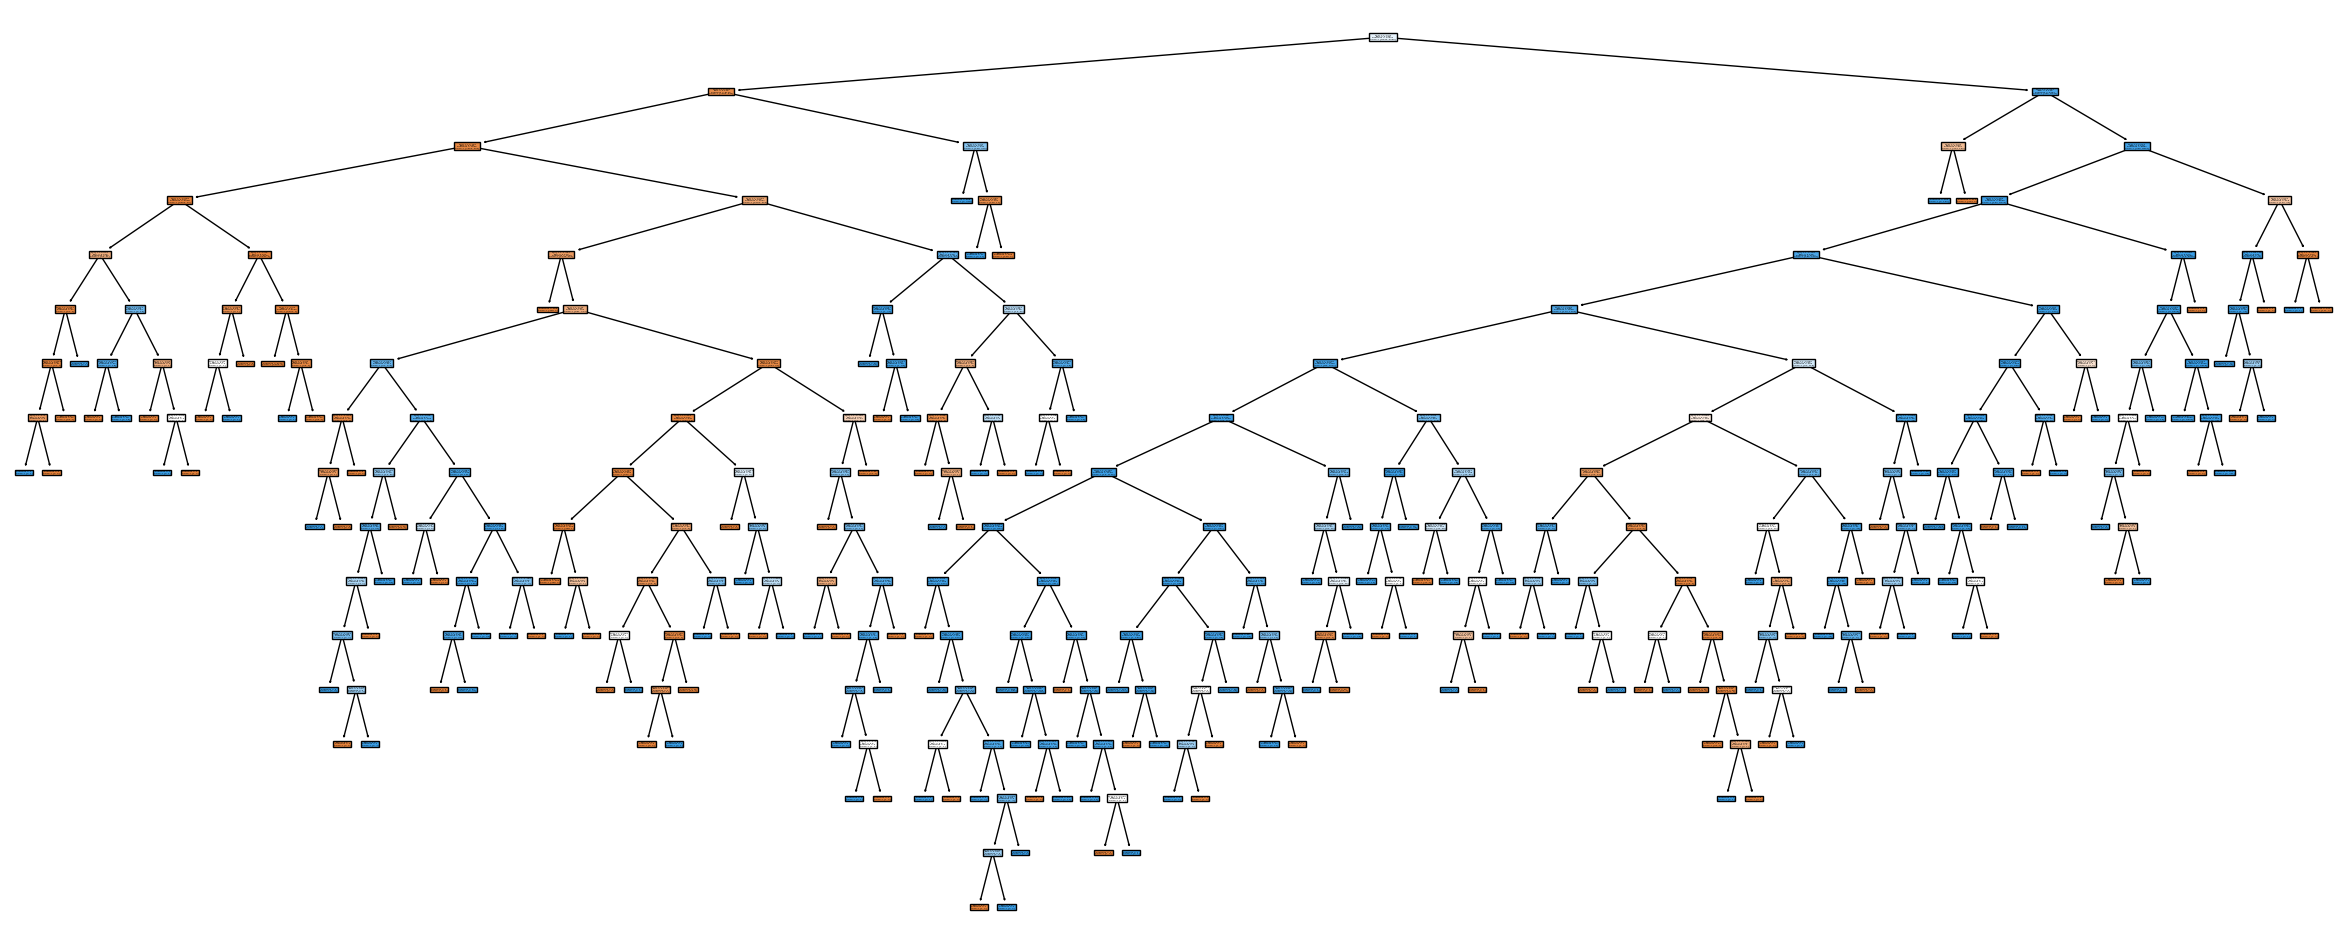

In [142]:
fig = plt.figure(figsize = (30,12))
tree.plot_tree(dt, filled=True);
plt.show()

In [143]:
# SUMMARY

In [144]:
data = [["Decision Tree", dt_train, dt_test], 
        ["Random Forest", rf_train, rf_test], 
        ["GBM", SKGB_train, SKGB_test], 
        ["SVM", SVM_train, SVM_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════╤═══════════════╤══════════════╕
│ Model         │   Train Score │   Test Score │
╞═══════════════╪═══════════════╪══════════════╡
│ Decision Tree │      1        │     0.994046 │
├───────────────┼───────────────┼──────────────┤
│ Random Forest │      0.999943 │     0.995766 │
├───────────────┼───────────────┼──────────────┤
│ GBM           │      0.994783 │     0.992723 │
├───────────────┼───────────────┼──────────────┤
│ SVM           │      0.967109 │     0.970098 │
╘═══════════════╧═══════════════╧══════════════╛
